<a href="https://colab.research.google.com/github/Emma-Coco/Screw-project/blob/main/test_amelia_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!unzip screw_dataset.zip

Archive:  screw_dataset.zip
   creating: screw_dataset/
  inflating: __MACOSX/._screw_dataset  
  inflating: screw_dataset/.DS_Store  
  inflating: __MACOSX/screw_dataset/._.DS_Store  
   creating: screw_dataset/bad/
  inflating: __MACOSX/screw_dataset/._bad  
   creating: screw_dataset/good/
  inflating: __MACOSX/screw_dataset/._good  
  inflating: screw_dataset/bad/023_png.rf.53e5fc79e243548f8792354dae3acf09.jpg  
  inflating: __MACOSX/screw_dataset/bad/._023_png.rf.53e5fc79e243548f8792354dae3acf09.jpg  
  inflating: screw_dataset/bad/006_png.rf.dba2300aaf35998d723c334bd8d334f7.jpg  
  inflating: __MACOSX/screw_dataset/bad/._006_png.rf.dba2300aaf35998d723c334bd8d334f7.jpg  
  inflating: screw_dataset/bad/013_png.rf.54ba3ab35a37b312543c98d486034db1.jpg  
  inflating: __MACOSX/screw_dataset/bad/._013_png.rf.54ba3ab35a37b312543c98d486034db1.jpg  
  inflating: screw_dataset/bad/001_png.rf.a9c493c563488514026a6f9dee8e857c.jpg  
  inflating: __MACOSX/screw_dataset/bad/._001_png.rf.a9c493c5

In [4]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.metrics import Recall, F1Score
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img, ImageDataGenerator
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import pathlib

print("Using TensorFlow version:", tf.__version__)

# Pour reproduire un comportement stable (optionnel)
tf.random.set_seed(42)

Using TensorFlow version: 2.18.0



Chargement et division des données...

Structure détectée:
- bad: 285 images
- good: 867 images

Taille des datasets:
- Entraînement: 806 images
- Validation: 173 images
- Test: 173 images

=== Avant augmentation ===

Analyse de Train original:
- Classe 0: 199 (24.7%)
- Classe 1: 607 (75.3%)

=== Application de l'augmentation ===

Configuration de l'entraînement:
- Échantillons augmentés: 408
- Nombre total d'échantillons: 1214
- Steps per epoch: 37
- Validation steps: 5

Démarrage de l'entraînement...
Epoch 1/50
32/37 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.5996 - loss: 0.7086 - recall: 0.7090

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 270ms/step - accuracy: 0.6067 - loss: 0.7015 - recall: 0.7190 - val_accuracy: 0.7500 - val_loss: 0.5660 - val_recall: 0.9917 - learning_rate: 0.0010
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 268ms/step - accuracy: 0.7432 - loss: 0.5391 - recall: 0.8933 - val_accuracy: 0.7000 - val_loss: 0.6242 - val_recall: 0.8083 - learning_rate: 0.0010
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.7866 - loss: 0.4803 - recall: 0.8739 - val_accuracy: 0.7563 - val_loss: 0.5708 - val_recall: 0.9000 - learning_rate: 0.0010
Epoch 4/50
31/37 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8103 - loss: 0.4570 - recall: 0.9472

37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.8103 - loss: 0.4545 - recall: 0.9448 - val_accuracy: 0.7688 - val_loss: 0.5446 - val_recall: 0.9833 - learning_rate: 0.0010
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.8183 - loss: 0.4211 - recall: 0.9323 - val_accuracy: 0.7500 - val_loss: 0.5729 - val_recall: 0.9750 - learning_rate: 0.0010
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.8180 - loss: 0.4180 - recall: 0.9303 - val_accuracy: 0.6938 - val_loss: 0.6292 - val_recall: 0.7417 - learning_rate: 0.0010
Epoch 7/50
31/37 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8135 - loss: 0.4105 - recall: 0.8803
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8150 - loss: 0.4088 - recall: 0.8839 - val_accuracy: 0.7563 - val_loss: 0.5603 - val_recall: 0.9667 - learning_rate: 0.0010
Epoch 8/50
31/37 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8318 - loss: 0.3902

37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8346 - loss: 0.3859 - recall: 0.9377 - val_accuracy: 0.7563 - val_loss: 0.5293 - val_recall: 0.9000 - learning_rate: 5.0000e-04
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.8734 - loss: 0.3219 - recall: 0.9497 - val_accuracy: 0.7312 - val_loss: 0.5495 - val_recall: 0.8500 - learning_rate: 5.0000e-04
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.8769 - loss: 0.3161 - recall: 0.9411 - val_accuracy: 0.7875 - val_loss: 0.5323 - val_recall: 0.9583 - learning_rate: 5.0000e-04
Epoch 11/50
31/37 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8667 - loss: 0.3424 - recall: 0.9393
Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.8685 - loss: 0.3399 - recall: 0.9392 - val_accuracy: 0.7500 - val_loss: 0.5493 - val_recall: 0.9583 - learning_rate: 5.0000e-04
Epoch 12/50
31/37 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8

37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.8757 - loss: 0.3153 - recall: 0.9699 - val_accuracy: 0.7750 - val_loss: 0.5290 - val_recall: 0.9583 - learning_rate: 2.5000e-04
Epoch 13/50
31/37 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8717 - loss: 0.3160 - recall: 0.9495

37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.8735 - loss: 0.3134 - recall: 0.9499 - val_accuracy: 0.7688 - val_loss: 0.5196 - val_recall: 0.9500 - learning_rate: 2.5000e-04
Epoch 14/50
31/37 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8927 - loss: 0.2870 - recall: 0.9695

37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.8914 - loss: 0.2868 - recall: 0.9667 - val_accuracy: 0.7875 - val_loss: 0.5195 - val_recall: 0.9500 - learning_rate: 2.5000e-04
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.8765 - loss: 0.2772 - recall: 0.9523 - val_accuracy: 0.7500 - val_loss: 0.5281 - val_recall: 0.8750 - learning_rate: 2.5000e-04
Epoch 16/50
31/37 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9057 - loss: 0.2596 - recall: 0.9531

37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.9039 - loss: 0.2628 - recall: 0.9532 - val_accuracy: 0.7875 - val_loss: 0.5167 - val_recall: 0.9417 - learning_rate: 2.5000e-04
Epoch 17/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.8885 - loss: 0.2780 - recall: 0.9735 - val_accuracy: 0.7625 - val_loss: 0.5237 - val_recall: 0.9500 - learning_rate: 2.5000e-04
Epoch 18/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.8974 - loss: 0.2658 - recall: 0.9640 - val_accuracy: 0.7500 - val_loss: 0.5193 - val_recall: 0.8583 - learning_rate: 2.5000e-04
Epoch 19/50
31/37 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8944 - loss: 0.2533 - recall: 0.9490

37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.8938 - loss: 0.2552 - recall: 0.9495 - val_accuracy: 0.8062 - val_loss: 0.5073 - val_recall: 0.9417 - learning_rate: 2.5000e-04
Epoch 20/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.8877 - loss: 0.2670 - recall: 0.9593 - val_accuracy: 0.7750 - val_loss: 0.5091 - val_recall: 0.9000 - learning_rate: 2.5000e-04
Epoch 21/50
31/37 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9100 - loss: 0.2543 - recall: 0.9618

37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - accuracy: 0.9093 - loss: 0.2541 - recall: 0.9618 - val_accuracy: 0.7937 - val_loss: 0.5047 - val_recall: 0.9250 - learning_rate: 2.5000e-04
Epoch 22/50
31/37 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9166 - loss: 0.2419 - recall: 0.9627

37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 303ms/step - accuracy: 0.9138 - loss: 0.2442 - recall: 0.9620 - val_accuracy: 0.7750 - val_loss: 0.5017 - val_recall: 0.8750 - learning_rate: 2.5000e-04
Epoch 23/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.9153 - loss: 0.2406 - recall: 0.9584 - val_accuracy: 0.7750 - val_loss: 0.5154 - val_recall: 0.8667 - learning_rate: 2.5000e-04
Epoch 24/50
31/37 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9239 - loss: 0.2215 - recall: 0.9712

37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.9211 - loss: 0.2253 - recall: 0.9689 - val_accuracy: 0.7875 - val_loss: 0.5008 - val_recall: 0.9250 - learning_rate: 2.5000e-04
Epoch 25/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.8919 - loss: 0.2538 - recall: 0.9506 - val_accuracy: 0.7937 - val_loss: 0.5021 - val_recall: 0.9417 - learning_rate: 2.5000e-04
Epoch 26/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.9273 - loss: 0.2210 - recall: 0.9664 - val_accuracy: 0.7812 - val_loss: 0.5087 - val_recall: 0.9000 - learning_rate: 2.5000e-04
Epoch 27/50
31/37 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9180 - loss: 0.2514 - recall: 0.9593
Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9192 - loss: 0.2478 - recall: 0.9616 - val_accuracy: 0.8062 - val_loss: 0.5048 - val_recall: 0.9250 - learning_rate: 2.5000e-04
Epoch 28/50
31/37 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accurac

37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.9288 - loss: 0.2106 - recall: 0.9717 - val_accuracy: 0.8188 - val_loss: 0.5006 - val_recall: 0.9333 - learning_rate: 1.2500e-04
Epoch 29/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9157 - loss: 0.2231 - recall: 0.9781 - val_accuracy: 0.8125 - val_loss: 0.5037 - val_recall: 0.9333 - learning_rate: 1.2500e-04
Epoch 30/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9145 - loss: 0.2323 - recall: 0.9652 - val_accuracy: 0.8000 - val_loss: 0.5027 - val_recall: 0.8917 - learning_rate: 1.2500e-04
Epoch 31/50
30/37 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9199 - loss: 0.2257 - recall: 0.9742

37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9190 - loss: 0.2259 - recall: 0.9744 - val_accuracy: 0.8000 - val_loss: 0.4928 - val_recall: 0.9083 - learning_rate: 1.2500e-04
Epoch 32/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9274 - loss: 0.2175 - recall: 0.9686 - val_accuracy: 0.8125 - val_loss: 0.4966 - val_recall: 0.9250 - learning_rate: 1.2500e-04
Epoch 33/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.9044 - loss: 0.2300 - recall: 0.9636 - val_accuracy: 0.8000 - val_loss: 0.5001 - val_recall: 0.9083 - learning_rate: 1.2500e-04
Epoch 34/50
31/37 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9253 - loss: 0.2061 - recall: 0.9699
Epoch 34: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9256 - loss: 0.2072 - recall: 0.9702 - val_accuracy: 0.8188 - val_loss: 0.5018 - val_recall: 0.9083 - learning_rate: 1.2500e-04
Epoch 35/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 

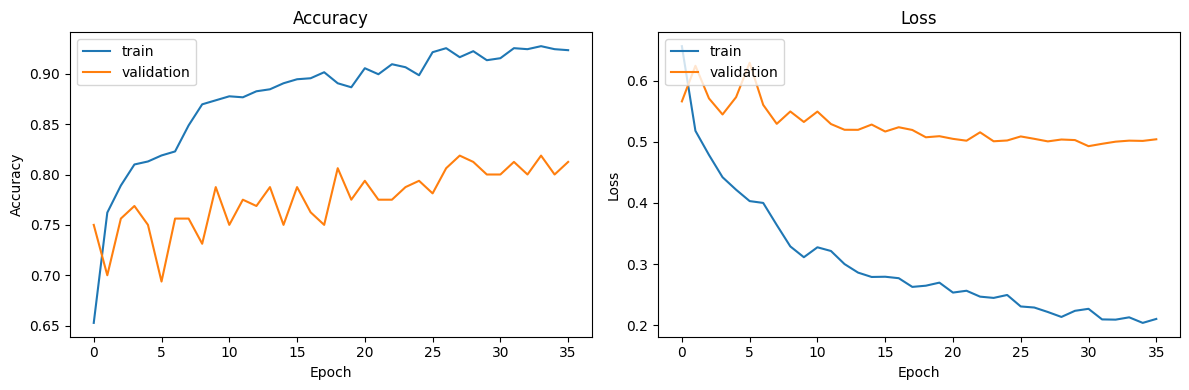

In [14]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import pathlib

# Configuration
DATA_DIR = "./screw_dataset"
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
SEED = 42
TEST_RATIO = 0.15
VAL_RATIO = 0.15

# --------------------------------------------------
# Étape 1: Chargement et division des données
# --------------------------------------------------
def load_and_split_data():
    print("\n" + "="*50)
    print("Chargement et division des données...")

    # Lister tous les fichiers avec leurs labels
    data_dir = pathlib.Path(DATA_DIR)
    all_files = list(data_dir.glob('*/*.jpg'))  # Adaptez l'extension si nécessaire
    classes = sorted([item.name for item in data_dir.glob('*') if item.is_dir()])

    print(f"\nStructure détectée:")
    for cls in classes:
        print(f"- {cls}: {len(list(data_dir.glob(cls+'/*')))} images")

    # Création des labels
    file_paths = [str(f) for f in all_files]
    labels = [classes.index(pathlib.Path(f).parent.name) for f in file_paths]

    # Division stratifiée en train/test/val
    X_train, X_temp, y_train, y_temp = train_test_split(
        file_paths, labels,
        test_size=(TEST_RATIO + VAL_RATIO),
        stratify=labels,
        random_state=SEED
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp,
        test_size=TEST_RATIO/(TEST_RATIO + VAL_RATIO),
        stratify=y_temp,
        random_state=SEED
    )

    print(f"\nTaille des datasets:")
    print(f"- Entraînement: {len(X_train)} images")
    print(f"- Validation: {len(X_val)} images")
    print(f"- Test: {len(X_test)} images")

    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

# --------------------------------------------------
# Étape 2: Création des datasets TensorFlow
# --------------------------------------------------
def create_tf_dataset(file_paths, labels):
    def load_image(path, label):
        img = tf.io.read_file(path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, IMG_SIZE)
        img = tf.cast(img, tf.float32) / 255.0
        return img, label

    dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# --------------------------------------------------
# Étape 3: Analyse et visualisation
# --------------------------------------------------
def analyze_split(X, y, set_name):
    class_counts = np.bincount(y)
    total = len(y)

    print(f"\nAnalyse de {set_name}:")
    for i, count in enumerate(class_counts):
        print(f"- Classe {i}: {count} ({count/total:.1%})")

# --------------------------------------------------
# Data Augmentation
# --------------------------------------------------
def augment_minority_class(dataset, minority_class):
    # Désassembler les batches et filtrer les éléments individuels
    def filter_minority(x, y):
        return tf.equal(y, minority_class)

    def filter_majority(x, y):
        return tf.not_equal(y, minority_class)

    # Séparer les classes
    minority_ds = dataset.unbatch().filter(filter_minority)
    majority_ds = dataset.unbatch().filter(filter_majority)

    # Calculer le besoin d'augmentation
    minority_count = len(list(minority_ds.as_numpy_iterator()))
    majority_count = len(list(majority_ds.as_numpy_iterator()))
    needed = majority_count - minority_count

    # Configuration d'augmentation
    augmentation_layers = tf.keras.Sequential([
        tf.keras.layers.RandomFlip('horizontal'),
        tf.keras.layers.RandomRotation(0.25),
        tf.keras.layers.RandomContrast(0.2),
        tf.keras.layers.RandomZoom(0.2),
        tf.keras.layers.GaussianNoise(0.01)
    ])

    # Fonction d'augmentation
    def augment_image(image, label):
        return augmentation_layers(image, training=True), label

    # Générer des échantillons supplémentaires avec take() au lieu de repeat()
    augmented_ds = minority_ds.map(augment_image).take(needed)

    # Combiner et réassembler les batches
    balanced_ds = minority_ds.concatenate(augmented_ds).concatenate(majority_ds)
    return balanced_ds.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# --------------------------------------------------
# Pipeline de données
# --------------------------------------------------
def data_pipeline():
    # Chargement des données
    (X_train, y_train), (X_val, y_val), (X_test, y_test) = load_and_split_data()

    # Analyse initiale
    print("\n=== Avant augmentation ===")
    analyze_split(X_train, y_train, "Train original")

    # Création du dataset de base
    base_train_ds = create_tf_dataset(X_train, y_train)

    # Identification de la classe minoritaire
    class_counts = np.bincount(y_train)
    minority_class = np.argmin(class_counts)
    minority_count = np.min(class_counts)
    majority_count = np.max(class_counts)
    augmented_samples = majority_count - minority_count

    # Application de l'augmentation ciblée
    print("\n=== Application de l'augmentation ===")
    balanced_ds = augment_minority_class(base_train_ds, minority_class)

    # Calcul explicite du nombre d'étapes
    train_steps = (len(X_train) + augmented_samples) // BATCH_SIZE
    val_steps = len(X_val) // BATCH_SIZE

    print(f"\nConfiguration de l'entraînement:")
    print(f"- Échantillons augmentés: {augmented_samples}")
    print(f"- Nombre total d'échantillons: {len(X_train) + augmented_samples}")
    print(f"- Steps per epoch: {train_steps}")
    print(f"- Validation steps: {val_steps}")

    return balanced_ds, create_tf_dataset(X_val, y_val), create_tf_dataset(X_test, y_test), train_steps, val_steps

# --------------------------------------------------
# Création et entraînement du modèle
# --------------------------------------------------
def create_and_train_model():
    # Obtenir les datasets et le nombre de steps
    train_dataset, val_dataset, test_dataset, steps_per_epoch, validation_steps = data_pipeline()

    # Créer le modèle MobileNetV2
    base_model = MobileNetV2(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet'
    )

    # Geler les couches de base_model
    base_model.trainable = False

    # Ajouter des couches personnalisées
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    # Créer le modèle final
    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Recall(name='recall')]
    )

    # Callbacks
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1,
        mode='min'
    )

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        mode='min',
        restore_best_weights=True
    )

    checkpoint = ModelCheckpoint(
        'mon_cnn.h5',
        save_best_only=True,
        monitor='val_loss',
        mode='min'
    )

    # Entraînement du modèle
    print("\n" + "="*50)
    print("Démarrage de l'entraînement...")

    history = model.fit(
        train_dataset,
        epochs=50,
        steps_per_epoch=steps_per_epoch,
        validation_data=val_dataset,
        validation_steps=validation_steps,
        callbacks=[early_stopping, checkpoint, reduce_lr]
    )

    return model, history, test_dataset

# --------------------------------------------------
# Exécution de l'entraînement
# --------------------------------------------------
model, history, test_dataset = create_and_train_model()

# Évaluation du modèle sur le dataset de test
print("\n" + "="*50)
print("Évaluation du modèle...")
test_loss, test_acc, test_recall = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test recall: {test_recall:.4f}")

# Visualisation des courbes d'apprentissage
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.tight_layout()
plt.savefig('training_curves.png')
plt.show()

In [6]:
# Recréez la fonction pour le pipeline de données d'évaluation
def create_evaluation_dataset():
    # Configuration
    DATA_DIR = "./screw_dataset"
    BATCH_SIZE = 32
    IMG_SIZE = (224, 224)
    SEED = 42
    TEST_RATIO = 0.15
    VAL_RATIO = 0.15

    # Lister tous les fichiers avec leurs labels
    data_dir = pathlib.Path(DATA_DIR)
    all_files = list(data_dir.glob('*/*.jpg'))
    classes = sorted([item.name for item in data_dir.glob('*') if item.is_dir()])

    # Création des labels
    file_paths = [str(f) for f in all_files]
    labels = [classes.index(pathlib.Path(f).parent.name) for f in file_paths]

    # Division stratifiée en train/test/val
    X_train, X_temp, y_train, y_temp = train_test_split(
        file_paths, labels,
        test_size=(TEST_RATIO + VAL_RATIO),
        stratify=labels,
        random_state=SEED
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp,
        test_size=TEST_RATIO/(TEST_RATIO + VAL_RATIO),
        stratify=y_temp,
        random_state=SEED
    )

    # Fonction pour créer les datasets
    def create_dataset(file_paths, labels):
        def load_image(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMG_SIZE)
            img = tf.cast(img, tf.float32) / 255.0
            return img, label

        dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
        dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
        return dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    # Créer les datasets
    val_dataset = create_dataset(X_val, y_val)

    # Calculer steps_per_epoch
    val_steps = len(X_val) // BATCH_SIZE

    return val_dataset, val_steps

# Utilisez cette fonction pour obtenir le dataset et les étapes
val_dataset, val_steps = create_evaluation_dataset()

# Chargez le modèle sauvegardé
loaded_model = tf.keras.models.load_model('mon_cnn.h5')

# Évaluez le modèle chargé
val_loss, val_accuracy, val_recall = loaded_model.evaluate(
    val_dataset,
    steps=val_steps,
    verbose=1
)

print(f"Loss sur la validation : {val_loss:.4f}")
print(f"Accuracy sur la validation : {val_accuracy:.4f}")
print(f"Recall sur la validation : {val_recall:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.8083 - loss: 0.5117 - recall: 0.9233
Loss sur la validation : 0.4928
Accuracy sur la validation : 0.8000
Recall sur la validation : 0.9083


In [ ]:
from tensorflow.keras.models import load_model

# Charger le modèle sauvegardé
model = load_model('mon_cnn.h5')  # Remplacez par le chemin de votre modèle

In [7]:
# Recréez la fonction pour le pipeline de données d'évaluation sur le test set
def create_test_dataset():
    # Configuration
    DATA_DIR = "./screw_dataset"
    BATCH_SIZE = 32
    IMG_SIZE = (224, 224)
    SEED = 42
    TEST_RATIO = 0.15
    VAL_RATIO = 0.15

    # Lister tous les fichiers avec leurs labels
    data_dir = pathlib.Path(DATA_DIR)
    all_files = list(data_dir.glob('*/*.jpg'))
    classes = sorted([item.name for item in data_dir.glob('*') if item.is_dir()])

    # Création des labels
    file_paths = [str(f) for f in all_files]
    labels = [classes.index(pathlib.Path(f).parent.name) for f in file_paths]

    # Division stratifiée en train/test/val
    X_train, X_temp, y_train, y_temp = train_test_split(
        file_paths, labels,
        test_size=(TEST_RATIO + VAL_RATIO),
        stratify=labels,
        random_state=SEED
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp,
        test_size=TEST_RATIO/(TEST_RATIO + VAL_RATIO),
        stratify=y_temp,
        random_state=SEED
    )

    # Fonction pour créer les datasets
    def create_dataset(file_paths, labels):
        def load_image(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMG_SIZE)
            img = tf.cast(img, tf.float32) / 255.0
            return img, label

        dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
        dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
        return dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    # Créer le dataset de test
    test_dataset = create_dataset(X_test, y_test)

    # Calculer les étapes
    test_steps = len(X_test) // BATCH_SIZE

    return test_dataset, test_steps

# Utilisez cette fonction pour obtenir le dataset et les étapes
test_dataset, test_steps = create_test_dataset()

# Chargez le modèle sauvegardé
loaded_model = tf.keras.models.load_model('mon_cnn.h5')

# Évaluez le modèle chargé sur le test dataset
print("\n" + "="*50)
print("Évaluation sur l'ensemble de test...")
test_loss, test_accuracy, test_recall = loaded_model.evaluate(
    test_dataset,
    steps=test_steps,
    verbose=1
)

print(f"Loss sur le test : {test_loss:.4f}")
print(f"Accuracy sur le test : {test_accuracy:.4f}")
print(f"Recall sur le test : {test_recall:.4f}")


Évaluation sur l'ensemble de test...
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.8718 - loss: 0.3792 - recall: 0.9636
Loss sur le test : 0.4435
Accuracy sur le test : 0.8250
Recall sur le test : 0.9407


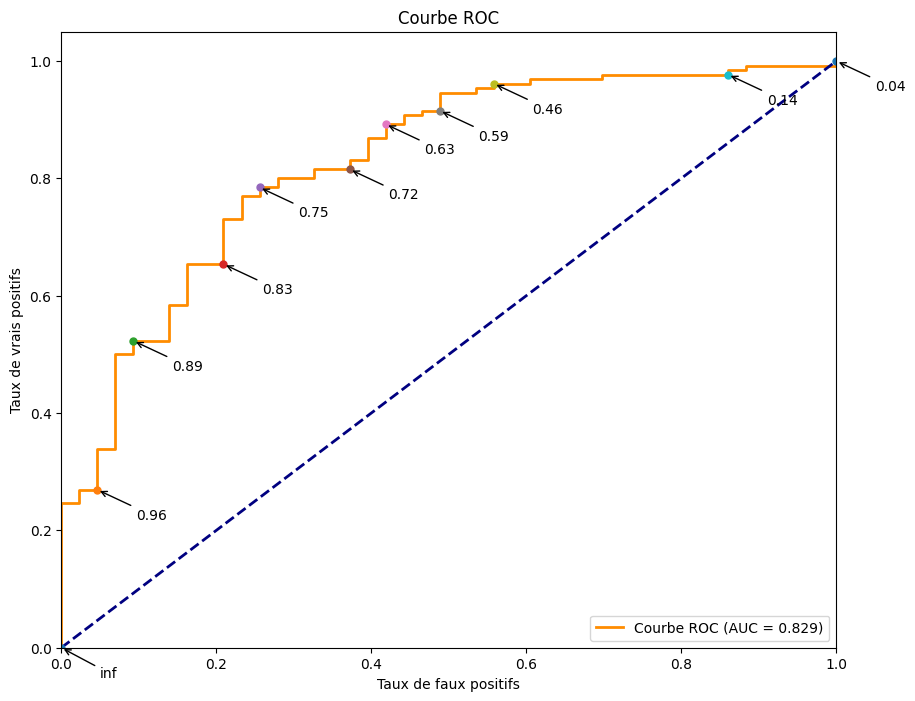

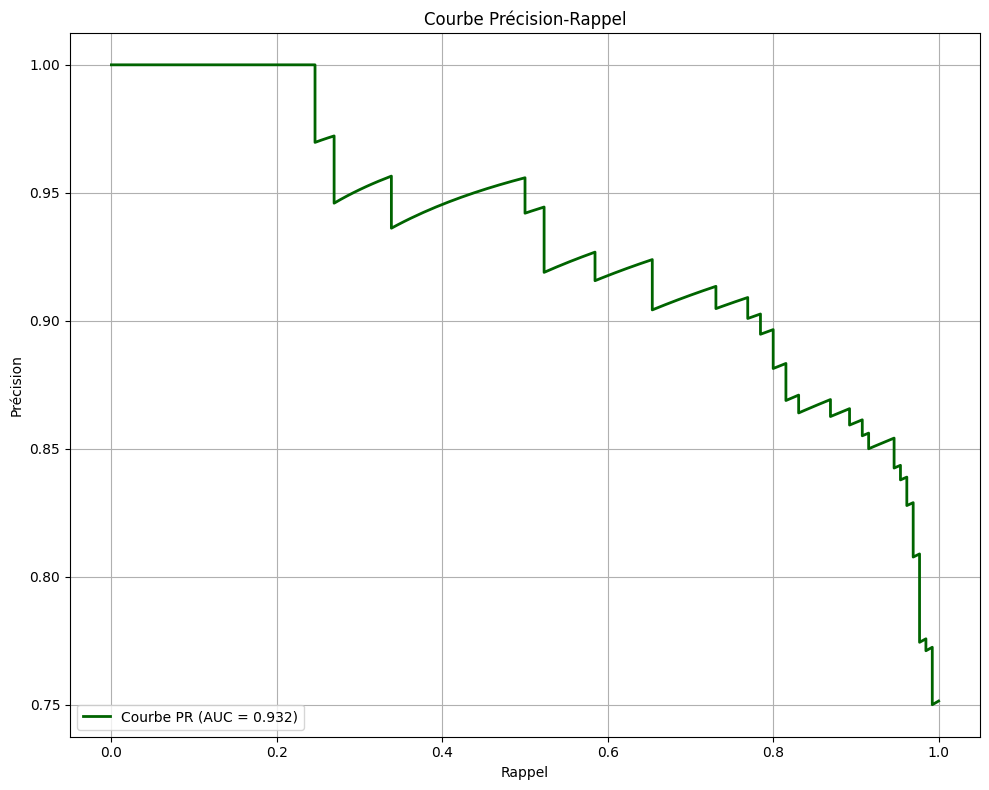

AUC-ROC: 0.8292
AUC-PR: 0.9316
Seuil optimal (selon J de Youden): 0.7663
Au seuil optimal: TPR = 0.7692, FPR = 0.2326


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Créer le dataset de test et récupérer le nombre d'exemples
def create_test_dataset():
    # Configuration
    DATA_DIR = "./screw_dataset"
    BATCH_SIZE = 32
    IMG_SIZE = (224, 224)
    SEED = 42
    TEST_RATIO = 0.15
    VAL_RATIO = 0.15

    # Lister tous les fichiers avec leurs labels
    data_dir = pathlib.Path(DATA_DIR)
    all_files = list(data_dir.glob('*/*.jpg'))
    classes = sorted([item.name for item in data_dir.glob('*') if item.is_dir()])

    # Création des labels
    file_paths = [str(f) for f in all_files]
    labels = [classes.index(pathlib.Path(f).parent.name) for f in file_paths]

    # Division stratifiée en train/test/val
    X_train, X_temp, y_train, y_temp = train_test_split(
        file_paths, labels,
        test_size=(TEST_RATIO + VAL_RATIO),
        stratify=labels,
        random_state=SEED
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp,
        test_size=TEST_RATIO/(TEST_RATIO + VAL_RATIO),
        stratify=y_temp,
        random_state=SEED
    )

    # Fonction pour créer les datasets
    def create_dataset(file_paths, labels):
        def load_image(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMG_SIZE)
            img = tf.cast(img, tf.float32) / 255.0
            return img, label

        dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
        dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
        return dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    # Créer le dataset de test
    test_dataset = create_dataset(X_test, y_test)

    # Calculer les étapes
    test_steps = len(X_test) // BATCH_SIZE

    return test_dataset, test_steps, len(X_test)  # Retourner aussi le nombre d'exemples

# Obtenir le dataset de test et le nombre d'exemples
test_dataset, test_steps, num_test_examples = create_test_dataset()

# Générer les prédictions (probabilités)
y_true = []
y_pred_proba = []

# Récupérer toutes les étiquettes et prédictions
for batch_images, batch_labels in test_dataset:
    batch_predictions = loaded_model.predict(batch_images, verbose=0)
    y_true.extend(batch_labels.numpy())
    y_pred_proba.extend(batch_predictions.flatten())

    # Limiter au nombre d'exemples réels de test
    if len(y_true) >= num_test_examples:  # Utiliser la variable num_test_examples au lieu de X_test
        y_true = y_true[:num_test_examples]
        y_pred_proba = y_pred_proba[:num_test_examples]
        break

# Calculer les points de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Créer la figure pour la courbe ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")

# Ajouter des points pour différents seuils
# Sélectionner quelques seuils significatifs à afficher
indices = np.arange(0, len(thresholds), max(1, len(thresholds) // 10))
for i in indices:
    plt.plot(fpr[i], tpr[i], 'o', markersize=5)
    plt.annotate(f'{thresholds[i]:.2f}',
                 xy=(fpr[i], tpr[i]),
                 xytext=(fpr[i]+0.05, tpr[i]-0.05),
                 arrowprops=dict(arrowstyle='->'))

# Ajouter une courbe de précision-rappel
precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='darkgreen', lw=2, label=f'Courbe PR (AUC = {pr_auc:.3f})')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Précision-Rappel')
plt.legend(loc="lower left")
plt.grid(True)

# Afficher les deux figures
plt.tight_layout()
plt.show()

# Afficher les métriques
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"AUC-PR: {pr_auc:.4f}")

# Trouver le meilleur seuil selon la métrique J de Youden (TPR - FPR)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Seuil optimal (selon J de Youden): {optimal_threshold:.4f}")
print(f"Au seuil optimal: TPR = {tpr[optimal_idx]:.4f}, FPR = {fpr[optimal_idx]:.4f}")

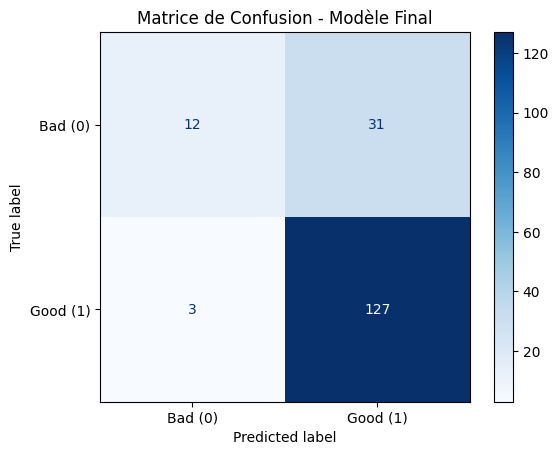

\nRapport de Classification :
              precision    recall  f1-score   support

     Bad (0)       0.80      0.28      0.41        43
    Good (1)       0.80      0.98      0.88       130

    accuracy                           0.80       173
   macro avg       0.80      0.63      0.65       173
weighted avg       0.80      0.80      0.77       173



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédictions sur l'ensemble de validation
y_pred = (y_proba > 0.5).astype(int)  # Seuil à 0.5 pour la classification binaire

# Calcul de la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Calcul et affichage de la matrice
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad (0)', 'Good (1)'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Matrice de Confusion - Modèle Final')
plt.show()

# Optionnel : Rapport de classification détaillé
from sklearn.metrics import classification_report
print("\\nRapport de Classification :")
print(classification_report(y_true, y_pred, target_names=['Bad (0)', 'Good (1)']))

In [ ]:
optimal_threshold = 0.7
# Prédire les probabilités sur le dataset de test
y_test_proba = model.predict(test_dataset).ravel()  # Probabilités de la classe positive

# Appliquer le seuil optimal pour obtenir les prédictions binaires
y_test_pred = (y_test_proba > optimal_threshold).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Extraire les vraies étiquettes du dataset de test
y_test = np.concatenate([y.numpy() for x, y in test_dataset], axis=0)

# Calculer les métriques
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Afficher les résultats
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

Test Accuracy: 0.7514
Test Recall: 0.8231
Test Precision: 0.8425
Test F1 Score: 0.8327
